In [6]:
import cv2 
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
folder = r"D:\AIC\Q2\Datasets\flowers\daisy"
flowers = [r"D:\AIC\Q2\Datasets\flowers\daisy",r"D:\AIC\Q2\Datasets\flowers\dandelion",r"D:\AIC\Q2\Datasets\flowers\rose",r"D:\AIC\Q2\Datasets\flowers\sunflower",r"D:\AIC\Q2\Datasets\flowers\tulip"]
images = []
labels = []
i = 0
for folder in flowers:
    for filename in os.listdir(folder):
        image = cv2.imread(os.path.join(folder,filename),0)
        if image is not None:
            images.append(image)
            labels.append(i)
    i = i+1
images = np.array(images,dtype = object)
"""Creating custom labels"""
labels = np.array(labels)
images.shape

(4323,)

In [8]:
X = []
for image in images:
    """"resizing and normalizing every image"""
    image = cv2.resize(image/255.0,(200,200))
    X.append(image)
X = np.array(X)
X.shape

(4323, 200, 200)

In [9]:
p = np.random.permutation(len(X))
X = X[p]
labels = labels[p]
X = tf.convert_to_tensor(X)
labels = tf.convert_to_tensor(labels)
X.shape,labels.shape

(TensorShape([4323, 200, 200]), TensorShape([4323]))

In [10]:
perc = int((X.shape[0]/100)*60)
x_train = X[0:perc]
y_train = labels[0:perc]
x_test = X[perc:]
y_test = labels[perc:]
x_train.shape[0]+x_test.shape[0]

4323

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax))

In [12]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x=x_train, y=y_train, epochs=50,verbose = 2)

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

82/82 - 5s - loss: 2.6972 - accuracy: 0.2379
Epoch 2/50
82/82 - 5s - loss: 1.8848 - accuracy: 0.2761
Epoch 3/50
82/82 - 5s - loss: 1.9282 - accuracy: 0.2927
Epoch 4/50
82/82 - 5s - loss: 1.6696 - accuracy: 0.3162
Epoch 5/50
82/82 - 4s - loss: 1.5908 - accuracy: 0.3112
Epoch 6/50
82/82 - 4s - loss: 1.6899 - accuracy: 0.2993
Epoch 7/50
82/82 - 4s - loss: 1.5466 - accuracy: 0.3212
Epoch 8/50
82/82 - 5s - loss: 1.5467 - accuracy: 0.3274
Epoch 9/50
82/82 - 5s - loss: 1.5734 - accuracy: 0.3189
Epoc

In [13]:
"""Evaluation Step"""
model.evaluate(x=x_test, y=y_test)


55/55 [==============================] - 1s 22ms/step - loss: 1.6293 - accuracy: 0.2855


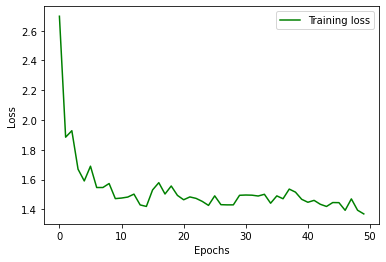

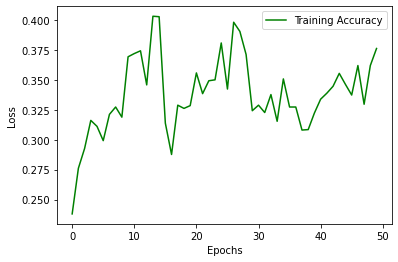

In [17]:
"""Plotting Loss and Accuracy Of The Model"""
loss_train = history.history['loss']
epochs = range(50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc_train = history.history['accuracy']
epochs = range(50)
plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
"""Prediction Step"""
prediction = model.predict(x_test)
prediction.max()

0.8454741